In [28]:
from ROOT import TFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

%matplotlib inline

In [29]:
weightsFile=TFile.Open("subset_a0a2.root")
nentries=weightsFile.degALL_a0a2Test_tree_flat.GetEntries()

In [30]:
nentries

135793L

In [31]:
cosTheta_X_cms=np.zeros(nentries)
cosTheta_eta_gjs=np.zeros(nentries)
phi_eta_gjs=np.zeros(nentries)
phi_X_cms=np.zeros(nentries)
cosThetaHighestEphotonIneta_gjs=np.zeros(nentries)
cosThetaHighestEphotonInpi0_cms=np.zeros(nentries)
vanHove_omegas=np.zeros(nentries)
Mpi0s=np.zeros(nentries)
Mpi0g1s=np.zeros(nentries)
Mpi0g2s=np.zeros(nentries)
Metas=np.zeros(nentries)
Mpi0etas=np.zeros(nentries)
sbRegions=np.zeros(nentries)

beamPhotonMatchToThrowns=np.zeros(nentries)
isTruePi0Etas=np.zeros(nentries)

for ievent,event in enumerate(weightsFile.degALL_a0a2Test_tree_flat):
    cosTheta_X_cms[ievent]=event.cosTheta_X_cm
    cosTheta_eta_gjs[ievent]=event.cosTheta_eta_gj
    phi_eta_gjs[ievent]=event.phi_eta_gj
    phi_X_cms[ievent]=event.phi_X_cm
    cosThetaHighestEphotonIneta_gjs[ievent]=event.cosThetaHighestEphotonIneta_gj
    cosThetaHighestEphotonInpi0_cms[ievent]=event.cosThetaHighestEphotonInpi0_cm
    vanHove_omegas[ievent]=event.vanHove_omega
    Mpi0s[ievent]=event.Mpi0
    Mpi0g1s[ievent]=event.Mpi0g1
    Mpi0g2s[ievent]=event.Mpi0g2
    Metas[ievent]=event.Meta
    Mpi0etas[ievent]=event.Mpi0eta
    sbRegions[ievent]=event.whichSignalRegion
    
    beamPhotonMatchToThrowns[ievent]=event.beamPhotonMatchToThrown
    isTruePi0Etas[ievent]=event.isTruePi0Eta

In [32]:
dataDict={
    "cosTheta_X_cms":cosTheta_X_cms,
    "cosTheta_eta_gjs":cosTheta_eta_gjs,
    "phi_eta_gjs":phi_eta_gjs,
    "phi_X_cms":phi_X_cms,
    "cosThetaHighestEphotonIneta_gjs":cosThetaHighestEphotonIneta_gjs,
    "cosThetaHighestEphotonInpi0_cms":cosThetaHighestEphotonInpi0_cms,
    "vanHove_omegas":vanHove_omegas,
    "beamPhotonMatchToThrowns":beamPhotonMatchToThrowns,
    "isTruePi0Etas":isTruePi0Etas,
    "Metas":Metas,
    "Mpi0s":Mpi0s,
    "Mpi0g1s":Mpi0g1s,
    "Mpi0g2s":Mpi0g2s,
    "Mpi0etas":Mpi0etas,
    "sbRegions":sbRegions
}


data=pd.DataFrame(dataDict)
data["matched"]=data.isTruePi0Etas*data.beamPhotonMatchToThrowns

# Plot parallel plot of a random subset

In [33]:
dataSubset=data.sample(200)
dataSubset=dataSubset.drop(["beamPhotonMatchToThrowns","isTruePi0Etas","sbRegions"],axis=1)
columns=dataSubset.columns

In [34]:
scaler = MinMaxScaler()
dataSubset=scaler.fit_transform(dataSubset)
dataSubset=pd.DataFrame(dataSubset,columns=columns)

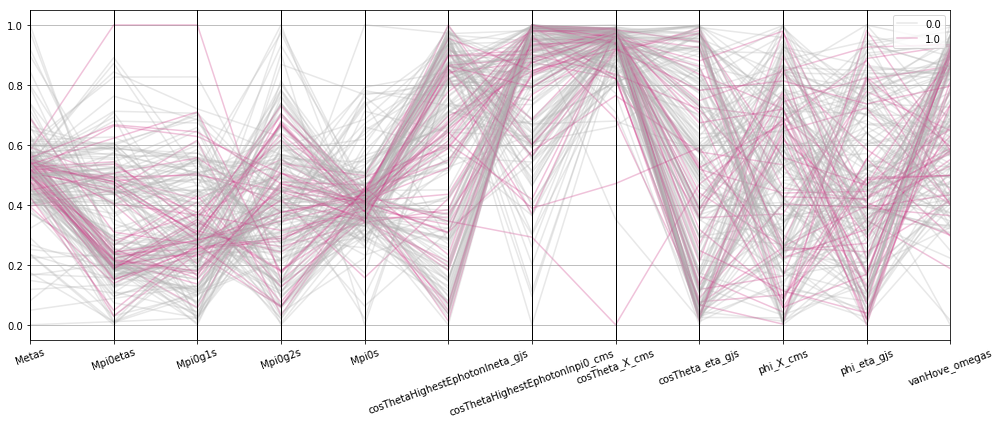

In [35]:
fig,ax=plt.subplots(1,1,figsize=(14,6))
pd.plotting.parallel_coordinates(dataSubset,"matched",color=(['#b3b3b3', '#cd3785']),alpha=0.3)
plt.xticks(rotation=20)
plt.tight_layout()

In [36]:
massHist,xBinEdges,yBinEdges=np.histogram2d(x=dataSubset.Mpi0s,y=dataSubset.Metas,bins=(30,30))
fig = go.Figure(data=[go.Surface(z=massHist,x=xBinEdges,y=yBinEdges)])

fig.update_layout(title='Mpi0 vs Meta', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict(
                    xaxis_title='Mpi0',
                    yaxis_title='Meta')
                 )
fig.show()

# Plot 1D phase space with thrown information

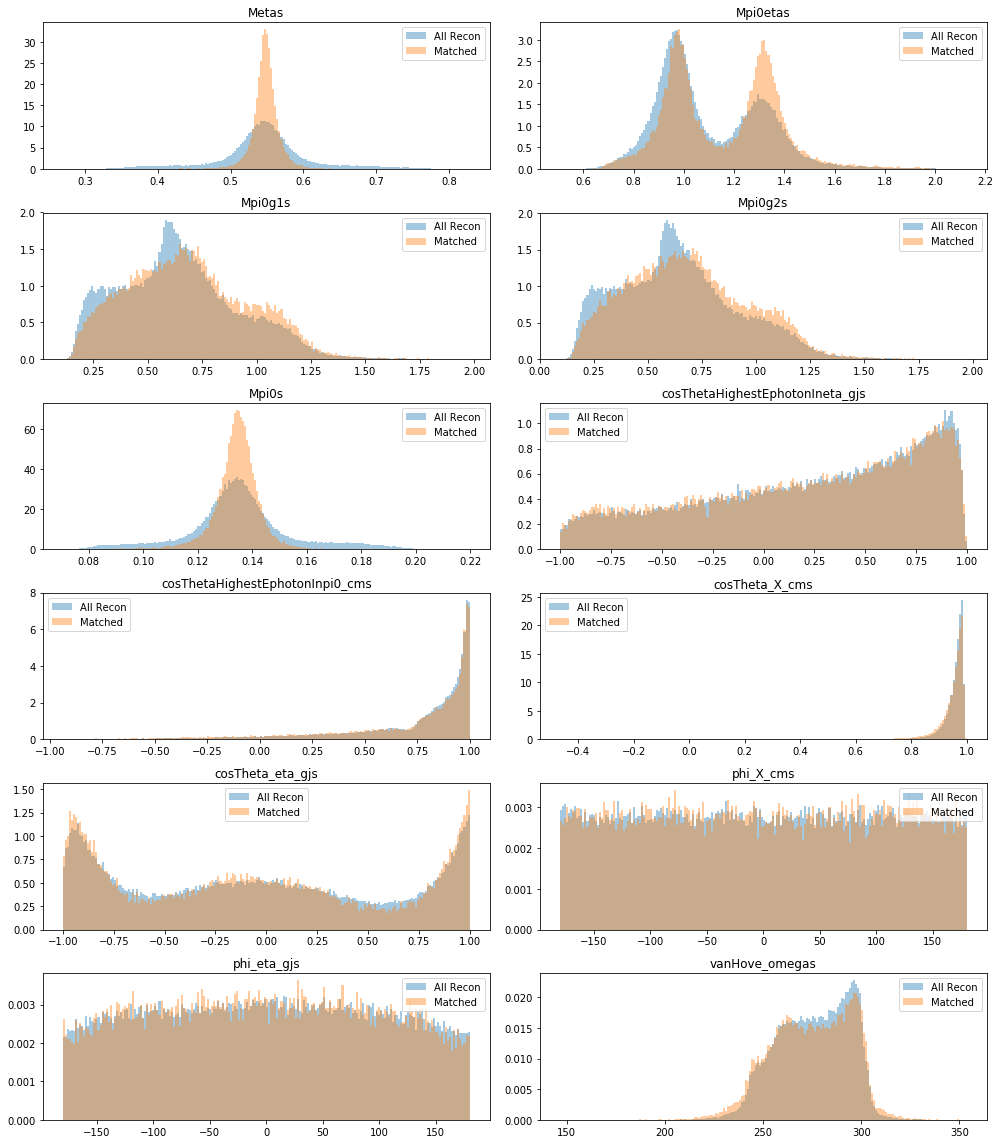

In [39]:
dataSubset=data.drop(["beamPhotonMatchToThrowns","isTruePi0Etas","sbRegions"],axis=1)
scaler = MinMaxScaler()
#dataSubset=scaler.fit_transform(dataSubset)
#dataSubset=pd.DataFrame(dataSubset,columns=columns)

fig,ax=plt.subplots(6,2,figsize=(14,16))
ax=ax.flatten()
for icol,col in enumerate(dataSubset.columns.drop('matched')):
    binEdges=np.histogram(dataSubset[col],bins=200)[1]
    ax[icol].hist(dataSubset[dataSubset.matched!=1][col],bins=binEdges,alpha=0.4,density=True
                 ,label="All Recon")
    ax[icol].hist(dataSubset[dataSubset.matched==1][col],bins=binEdges,alpha=0.4,density=True
                 ,label="Matched")
    ax[icol].set_title(col)
    ax[icol].legend()
plt.tight_layout()

# Check what the distributions look like in signal vs the sideband regions.

The goal of this would be to look at if there are differences between the distributions of the variables in the signal vs the sideband

In [ ]:
dataSubset=data.drop(["beamPhotonMatchToThrowns","isTruePi0Etas","sbRegions"],axis=1)
scaler = MinMaxScaler()
dataSubset=scaler.fit_transform(dataSubset)
dataSubset=pd.DataFrame(dataSubset,columns=columns)

fig,ax=plt.subplots(6,2,figsize=(14,16))
ax=ax.flatten()
for icol,col in enumerate(dataSubset.columns.drop('matched')):
    binEdges=np.histogram(dataSubset[col],bins=200)[1]
    ax[icol].hist(dataSubset[dataSubset.matched!=1][col],bins=binEdges,alpha=0.4,density=True
                 ,label="All Recon")
    ax[icol].hist(dataSubset[dataSubset.matched==1][col],bins=binEdges,alpha=0.4,density=True
                 ,label="Matched")
    ax[icol].set_title(col)
    ax[icol].legend()
plt.tight_layout()

# Check distribution of neighbors given signal/bkg tag

How does accidentals change the distribution of neighbors

In [15]:
phaseSpace=["cosTheta_X_cms","cosTheta_eta_gjs","phi_eta_gjs"]
kDim=200

In [16]:
# do min max scalin of the phase space
dataPhaseSpace=data[phaseSpace]
dataPhaseSpace=scaler.fit_transform(dataPhaseSpace)
dataPhaseSpace=pd.DataFrame(dataPhaseSpace,columns=phaseSpace)

In [19]:
def getNearestNeighbors(eventNumber):
    #current event number
    #eventNumber=1

    # Find nearest neighbors
    distances=(dataPhaseSpace-dataPhaseSpace.iloc[eventNumber]).drop(eventNumber)
    summedDistances=distances[phaseSpace[0]]*distances[phaseSpace[0]]
    for iVar in np.arange(len(phaseSpace)-1)+1:
        summedDistances += distances[phaseSpace[iVar]]*distances[phaseSpace[iVar]]
    kNN=summedDistances.sort_values()[:kDim]

    # Grab useful diagnostic variables
    matched=data[["matched","sbRegions","Mpi0s","Metas","Mpi0etas"]].drop(eventNumber)
    matchedKNN=matched.loc[kNN.index]
    
    # Also grab a random dataset
    randomKNN=matched.sample(200)

    # Grab current values
    current=data[["matched","sbRegions","Mpi0s","Metas","Mpi0etas"]].loc[eventNumber]
    
    return matchedKNN, randomKNN, current

In [20]:
def plotKNN(eventNumber):
    matchedKNN, randomKNN, current = getNearestNeighbors(eventNumber)
    
    fig,ax=plt.subplots(2,3,figsize=(16,8))
    ax=ax.flatten()
    for icol,col in enumerate(matchedKNN.columns):
        matchedKNN[col].hist(ax=ax[icol],bins=40,alpha=0.3)
        randomKNN[col].hist(ax=ax[icol],bins=40,alpha=0.3)
        ax[icol].grid(linestyle='dotted')
        title=col
        if col=="sbRegions":
            signalPercent=1.0*sum(matchedKNN[col]==1)/len(matchedKNN)
            title+=" - "+str(int(100*signalPercent)/100.0)+"% signal"
        ax[icol].set_title(title)
        ax[icol].axvline(current[col],c='red')
    plt.tight_layout()

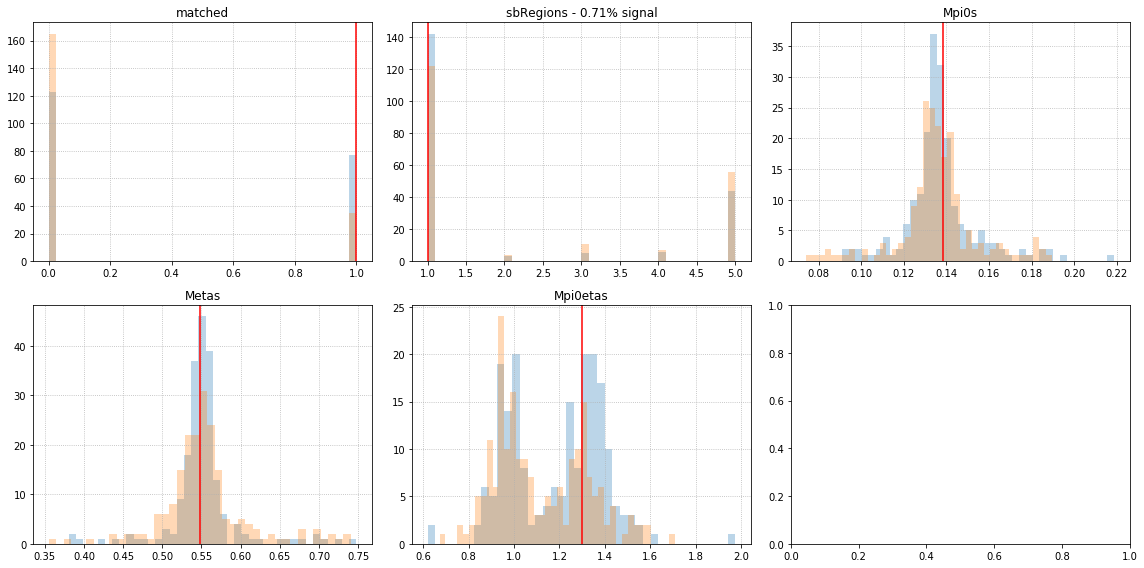

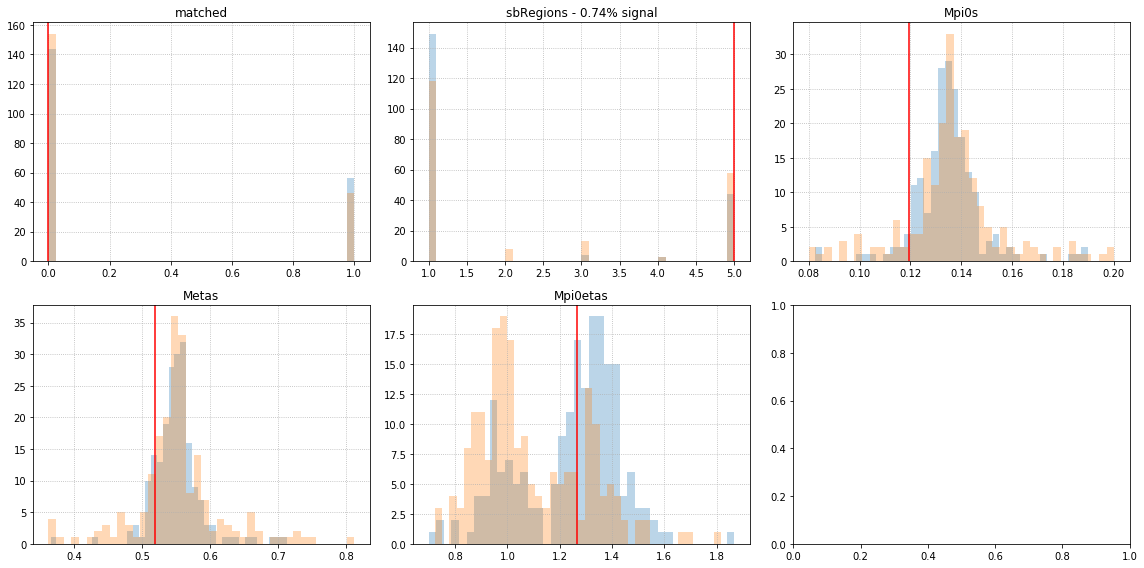

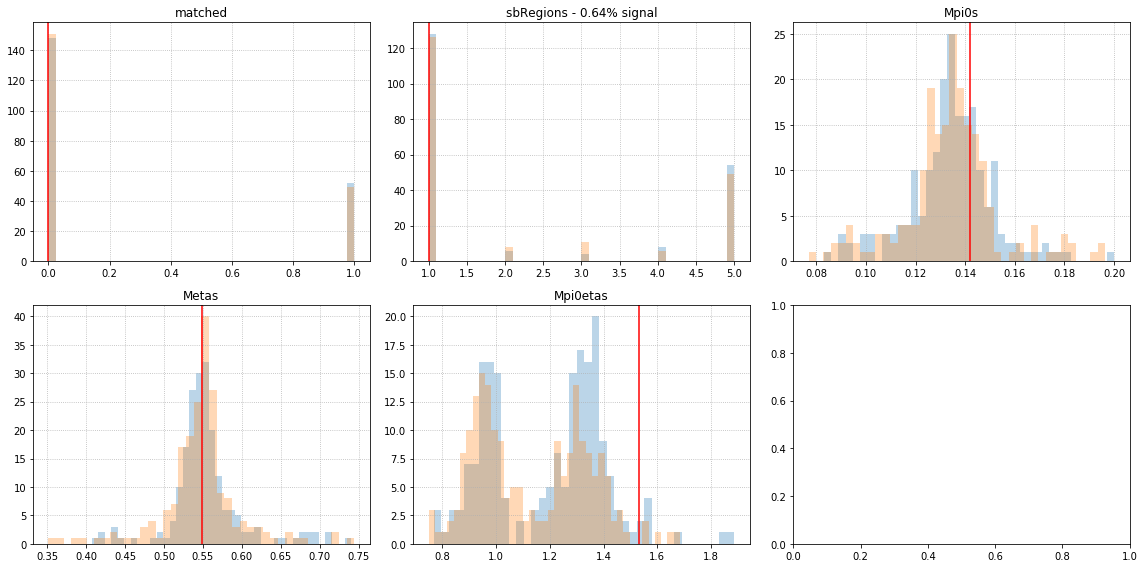

In [27]:
plotKNN(0)
plotKNN(1)
plotKNN(2)